### Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

### Dataset:
The dataset can be download from Olympus.   
The data file names are:   
images.npy.     
Label.csv.  
### Context:
Can you differentiate a weed from a crop seedling?  
The ability to do so effectively can mean better crop yields and better stewardship of the environment.   
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages


### Objective:

## 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks) 



In [1]:
# Import necessary libraries.

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam ,RMSprop

import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive





In [2]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#labelsData
imagesData = np.load('/content/drive/My Drive/projectcnn/images.npy')
labels=pd.read_csv('/content/drive/My Drive/projectcnn/Labels.csv')

In [4]:
imagesData.shape

(4750, 128, 128, 3)

In [5]:
labels.shape

(4750, 1)

In [6]:
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [7]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [8]:
labels['Label'][0]

'Small-flowered Cranesbill'

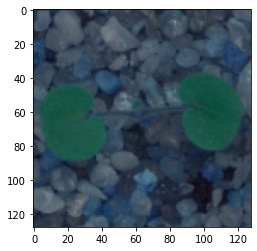

In [9]:
plt.imshow(imagesData[0]);

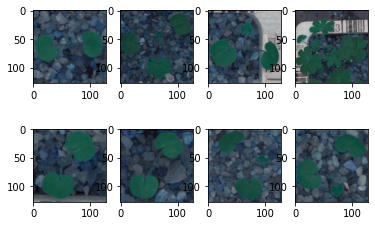

In [10]:
# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(imagesData[i])

In [11]:
labels['Label'][33]

'Small-flowered Cranesbill'

### 2. Data Pre-processing: (15 Marks) 
a. Normalization.   
b. Gaussian Blurring.   
c. Visualize data after pre-processing.    



In [12]:
imagesData[33].shape

(128, 128, 3)

Original Image:



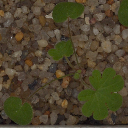

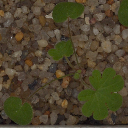


 Output after first gaussian blurring: 



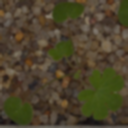

In [13]:
testImage=imagesData[33].astype('float32')

Gaussian1 = cv2.GaussianBlur(testImage, (5, 5), 0)
print('Original Image:\n')
cv2_imshow(imagesData[33])

cv2_imshow(testImage)
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian1)


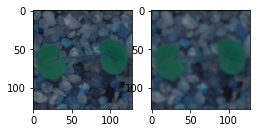

In [14]:
# Gaussian Blurring.
blurTrainImg = []
showEx = True
for img in imagesData:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
   
    
    blurTrainImg.append(blurImg)  # Append image without backgroung
    
    # Show examples
    if showEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        showEx = False

blurTrainImg = np.asarray(blurTrainImg)

In [15]:
blurTrainImg.shape

(4750, 128, 128, 3)

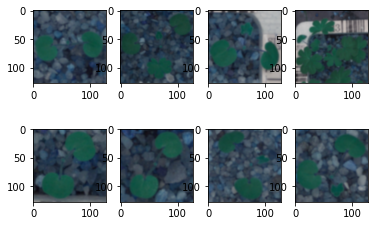

In [16]:
# Visualize data after pre-processing.
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blurTrainImg[i])

In [17]:
#Normalize input

blurTrainImg = blurTrainImg / 255

### 3. Make data compatible: (10 Marks) 
a. Convert labels to one-hot-vectors.    
b. Print the label for y_train[0].    
c. Split the dataset into training, testing, and validation set.    
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)     
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.     


In [18]:
#Convert labels to one-hot-vectors.
#Label encoding target variable
species = labels['Label'].unique()

labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(species)
encodedlabels = labelencoder.transform( labels['Label'])
print('\n')
print('Classes'+str(labelencoder.classes_))


# One Hot Encoding
onehotencoded_labels = keras.utils.to_categorical(encodedlabels)



Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [19]:
species

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [20]:
onehotencoded_labels.shape

(4750, 12)

In [21]:
#Split the dataset into training, testing, and validation set.
# create training and testing vars using blurTrainImg
X_train, X_test1, y_train, y_test1 = train_test_split(blurTrainImg, onehotencoded_labels, test_size=0.3)
print (X_train.shape,y_train.shape)
print (X_test1.shape, y_test1.shape)

(3325, 128, 128, 3) (3325, 12)
(1425, 128, 128, 3) (1425, 12)


In [22]:
X_test, X_valid, y_test, y_valid= train_test_split(X_test1, y_test1, test_size=0.5)
print (X_test.shape,y_test.shape)
print (X_valid.shape, y_valid.shape)

(712, 128, 128, 3) (712, 12)
(713, 128, 128, 3) (713, 12)


In [23]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
X_test[0]

array([[[0.38431373, 0.4627451 , 0.50196078],
        [0.38431373, 0.4627451 , 0.49803922],
        [0.37647059, 0.45490196, 0.49019608],
        ...,
        [0.17647059, 0.21176471, 0.28627451],
        [0.16862745, 0.20784314, 0.27843137],
        [0.16862745, 0.20784314, 0.27843137]],

       [[0.38823529, 0.47058824, 0.50980392],
        [0.38823529, 0.46666667, 0.50588235],
        [0.38039216, 0.4627451 , 0.49411765],
        ...,
        [0.17254902, 0.21176471, 0.28235294],
        [0.16862745, 0.20784314, 0.27843137],
        [0.16470588, 0.20784314, 0.2745098 ]],

       [[0.4       , 0.48235294, 0.52156863],
        [0.39607843, 0.47843137, 0.51764706],
        [0.38823529, 0.47058824, 0.50588235],
        ...,
        [0.16862745, 0.20784314, 0.27843137],
        [0.16470588, 0.20392157, 0.2745098 ],
        [0.16078431, 0.20392157, 0.2745098 ]],

       ...,

       [[0.2       , 0.26666667, 0.35294118],
        [0.2       , 0.26666667, 0.34901961],
        [0.2       , 0

In [25]:
#compatible with keras

### 4. Building CNN: (15 Marks)
a. Define layers. 
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.) 



In [26]:

num_classes=12
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        1

### 5. Fit and evaluate model and print confusion matrix. (10 Marks) 



In [27]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [28]:
# Set the batch size, number of epochs.
batch_size = 64
epochs = 30

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping,model_checkpoint])

Epoch 1/30
52/52 [==============================] - ETA: 0s - loss: 2.4105 - accuracy: 0.1588
Epoch 00001: val_loss improved from inf to 2.34754, saving model to cifar_cnn_checkpoint_01_loss2.3475.h5
52/52 [==============================] - 5s 98ms/step - loss: 2.4105 - accuracy: 0.1588 - val_loss: 2.3475 - val_accuracy: 0.1865
Epoch 2/30
52/52 [==============================] - ETA: 0s - loss: 2.1004 - accuracy: 0.2986
Epoch 00002: val_loss improved from 2.34754 to 1.93195, saving model to cifar_cnn_checkpoint_02_loss1.9319.h5
52/52 [==============================] - 4s 78ms/step - loss: 2.1004 - accuracy: 0.2986 - val_loss: 1.9319 - val_accuracy: 0.3548
Epoch 3/30
52/52 [==============================] - ETA: 0s - loss: 1.7846 - accuracy: 0.3835
Epoch 00003: val_loss improved from 1.93195 to 1.66868, saving model to cifar_cnn_checkpoint_03_loss1.6687.h5
52/52 [==============================] - 4s 78ms/step - loss: 1.7846 - accuracy: 0.3835 - val_loss: 1.6687 - val_accuracy: 0.4250
Ep

In [41]:
# Evaluate trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 13ms/step - loss: 1.0094 - accuracy: 0.7247
Test loss: 1.009392499923706
Test accuracy: 0.7247191071510315


In [44]:
validation_predictions = model.predict_classes(X_test)
report=classification_report(tf.argmax(y_test,axis=1),validation_predictions)
print(report)
#Confusion Matrix 

              precision    recall  f1-score   support

           0       0.40      0.05      0.09        41
           1       0.88      0.79      0.83        66
           2       0.90      0.66      0.76        41
           3       0.75      0.92      0.82        84
           4       0.80      0.36      0.50        33
           5       0.70      0.77      0.73        69
           6       0.62      0.91      0.73        97
           7       0.81      0.64      0.71        39
           8       0.64      0.74      0.69        70
           9       0.52      0.43      0.47        28
          10       0.82      0.94      0.88        89
          11       0.73      0.58      0.65        55

    accuracy                           0.72       712
   macro avg       0.71      0.65      0.66       712
weighted avg       0.72      0.72      0.70       712



### 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [45]:
print(validation_predictions[2] , 'Actual class', tf.argmax(y_test[2]))

10 Actual class tf.Tensor(10, shape=(), dtype=int64)


In [46]:
##  Text Index 2 Predicted Class correctly : 8 actual  and 8 Predicted ( 9 bit , 0 start) 

In [47]:
print(validation_predictions[3] , 'Actual class', tf.argmax(y_test[3]))

2 Actual class tf.Tensor(2, shape=(), dtype=int64)


In [48]:
##  Text Index 33 Predicted Class correctly : 6 actual  and 6 predicted   ( 7 bit, 0 start) 

In [49]:
print(validation_predictions[33] , 'Actual class', tf.argmax(y_test[33]))

2 Actual class tf.Tensor(2, shape=(), dtype=int64)


In [50]:
##  Text Index 33 Predicted Class INCORRECTLY  : 0 actual  and 6 predicted   ( 7 bit, 0 start) 

In [51]:
print(validation_predictions[59] , 'Actual class', tf.argmax(y_test[59]))

6 Actual class tf.Tensor(6, shape=(), dtype=int64)


In [52]:
##  Text Index 59 Predicted Class correctly : 7 actual  and 7 Predicted ( 8 bit, 0 start) 